# Part 1

- Import du jeu de données : World Income Distribution
- Import du jeu de données : Population mondiale depuis la FAO
- Table de correspondance "Nom de pays entier" => "Nom de pays ISO 3"
- Merge et nettoyage des données
- Création d'un dataframe résumant les données
- Calcul de l'indice de Gini pour chaque pays

In [1]:
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from descstats import Univa, MyPlot

Repository de mon module DescStats : https://github.com/nicodesh/DescStats

## Income by country
Source : World Income Distribution (via: https://openclassrooms.com/fr/projects/148/assignment)

In [2]:
the_csv = pd.read_csv("data/data.csv", decimal=",")
display(the_csv.shape)
display(the_csv.head(10))

(11599, 6)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0
5,ALB,2008,6,100,1171.14120,7297.0
6,ALB,2008,7,100,1201.13240,7297.0
7,ALB,2008,8,100,1240.89760,7297.0
8,ALB,2008,9,100,1285.69140,7297.0
9,ALB,2008,10,100,1325.25330,7297.0


In [3]:
main_df = the_csv.copy()
columns = {'year_survey': 'year'}
main_df.rename(columns=columns, inplace=True)
display(main_df.head(1))

,country,year,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0


In [4]:
display(main_df.country.unique())
display(main_df.year.unique())

array(['ALB', 'ARG', 'ARM', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR',
       'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHL', 'CHN',
       'CIV', 'CMR', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM',
       'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO',
       'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KOR', 'XKX', 'LAO', 'LBR', 'LKA', 'LTU',
       'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE',
       'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NER', 'NGA', 'NIC', 'NLD',
       'NOR', 'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY',
       'ROU', 'RUS', 'SDN', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'SWZ',
       'SYR', 'THA', 'TJK', 'TLS', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR',
       'URY', 'USA', 'VEN', 'VNM', 'PSE', 'YEM', 'ZAF', 'COD'],
      dtype=object)

array([2008, 2009, 2010, 2007, 2006, 2011, 2004])

## World Population

Source : FAO http://www.fao.org/faostat/fr/#data/OA

In [5]:
pop_df = pd.read_csv("data/population.csv")
display(pop_df.shape)
display(pop_df.head(1))

(1845, 15)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24118.979,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."


In [6]:
pop_df.Unité.unique()

array(['1000 personnes'], dtype=object)

In [7]:
pop_df = pop_df[['Zone', 'Année', 'Valeur']].copy()

columns = {
    'Zone': 'country_full',
    'Année': 'year',
    'Valeur': 'population'
}
pop_df.rename(columns=columns, inplace=True)
pop_df.population = (pop_df.population * 1000).astype(int)
display(pop_df.head(10))

,country_full,year,population
0,Afghanistan,2004,24118979
1,Afghanistan,2005,25070798
2,Afghanistan,2006,25893450
3,Afghanistan,2007,26616792
4,Afghanistan,2008,27294031
5,Afghanistan,2009,28004331
6,Afghanistan,2010,28803167
7,Afghanistan,2011,29708599
8,Afrique du Sud,2004,48247395
9,Afrique du Sud,2005,48820585


## Country Name / ISO 3

Source : https://sql.sh/514-liste-pays-csv-xml

In [8]:
iso_df = pd.read_csv("data/country-iso.csv", header=None)
display(iso_df.head())

,0,1,2,3,4,5
0,1,4,AF,AFG,Afghanistan,Afghanistan
1,2,8,AL,ALB,Albanie,Albania
2,3,10,AQ,ATA,Antarctique,Antarctica
3,4,12,DZ,DZA,Algérie,Algeria
4,5,16,AS,ASM,Samoa Américaines,American Samoa


In [9]:
def rename_country(x):
    
    if (x == 'République Démocratique du Congo'):
        return 'République démocratique du Congo'
    
    elif (x == 'Bolivie'):
        return 'Bolivie (État plurinational de)'
    
    elif (x == 'République Centrafricaine'):
        return 'République centrafricaine'
    
    elif (x == 'République Tchèque'):
        return 'Tchéquie (la)'
    
    elif (x == 'République Dominicaine'):
        return 'République dominicaine'
    
    elif (x == 'République Islamique d\'Iran'):
        return 'Iran (République islamique d\')'
    
    elif (x == 'République Démocratique Populaire Lao'):
        return 'République démocratique populaire lao'
    
    elif (x == 'L\'ex-République Yougoslave de Macédoine'):
        return 'Macédoine du Nord'
    
    elif (x == 'Soudan'):
        return 'Soudan (ex)'
    
    elif (x == 'Swaziland'):
        return 'Eswatini'
    
    elif (x == 'Taïwan'):
        return 'Chine, Taiwan Province de'
    
    elif (x == 'États-Unis'):
        return 'États-Unis d\'Amérique'
    
    elif (x == 'Venezuela'):
        return 'Venezuela (République bolivarienne du)'
    
    elif (x == 'Territoire Palestinien Occupé'):
        return 'Palestine'
    
    elif (x == 'République Arabe Syrienne'):
        return 'République arabe syrienne'
    
    else:
        return x
    
    
iso_df = iso_df[[4,3]].copy()
iso_df.rename(columns={4:'country_full',3:'country'}, inplace=True)
iso_df.country_full = iso_df.country_full.apply(rename_country)
iso_df.head()

,country_full,country
0,Afghanistan,AFG
1,Albanie,ALB
2,Antarctique,ATA
3,Algérie,DZA
4,Samoa Américaines,ASM


In [10]:
data = {
    'country':['XKX', 'MNE', 'SRB'],
    'country_full':['Kosovo', 'Monténégro', 'Serbie']
}

data = pd.DataFrame(data)

iso_df = pd.concat([iso_df, data], sort=False).reset_index(drop=True)

## Merge data

In [11]:
main_df = main_df.merge(iso_df, how='left', on='country').copy()
main_df = main_df.merge(pop_df, how='left', on=['country_full', 'year'])
display(main_df.head())

,country,year,quantile,nb_quantiles,income,gdpppp,country_full,population
0,ALB,2008,1,100,728.89795,7297.0,Albanie,2991651.0
1,ALB,2008,2,100,916.66235,7297.0,Albanie,2991651.0
2,ALB,2008,3,100,1010.91600,7297.0,Albanie,2991651.0
3,ALB,2008,4,100,1086.90780,7297.0,Albanie,2991651.0
4,ALB,2008,5,100,1132.69970,7297.0,Albanie,2991651.0


## Clean data

#### Country with no population

In [12]:
main_df[main_df.population.isna()].country.unique()

array(['XKX'], dtype=object)

In [13]:
# Remove Kosovo
main_df = main_df[main_df.country != 'XKX'].copy()

#### Country with no GDP

In [14]:
main_df[main_df.gdpppp.isna()].country.unique()

array(['PSE'], dtype=object)

In [15]:
# Remove Palestine
main_df = main_df[main_df.country != 'PSE'].copy()

In [16]:
# Population to int
main_df.population = main_df.population.astype(int)

#### Clean index

In [17]:
main_df.reset_index(drop=True, inplace=True)

In [18]:
main_df.head()

,country,year,quantile,nb_quantiles,income,gdpppp,country_full,population
0,ALB,2008,1,100,728.89795,7297.0,Albanie,2991651
1,ALB,2008,2,100,916.66235,7297.0,Albanie,2991651
2,ALB,2008,3,100,1010.91600,7297.0,Albanie,2991651
3,ALB,2008,4,100,1086.90780,7297.0,Albanie,2991651
4,ALB,2008,5,100,1132.69970,7297.0,Albanie,2991651


## Dataframe to summarize countries and population

---
#### Data Population

In [19]:
data_pop = (
    main_df[['country_full', 'year', 'population']]
        .drop_duplicates()
        .groupby('year')
        .sum()
)
data_pop.rename(columns={'population': 'data_pop'}, inplace=True)

data_pop.head(10)

,data_pop
year,
2004,17806638
2006,288080792
2007,2738504044
2008,2327694781
2009,475374061
2010,389144319
2011,14948919


#### FAO Population

In [20]:
fao_pop = pop_df.groupby('year').sum()
fao_pop.rename(columns={'population': 'fao_pop'}, inplace=True)

fao_pop.head(10)

,fao_pop
year,
2004,7805114732
2005,7893696048
2006,7983136151
2007,8073454300
2008,8164569643
2009,8256334751
2010,8348588832
2011,8441082517


#### Consolidation

In [21]:
overview = fao_pop.copy()

overview['data_pop'] = data_pop
overview['data_pop'] = overview['data_pop'].fillna(0).astype(int)

display(overview)

,fao_pop,data_pop
year,,
2004,7805114732,17806638
2005,7893696048,0
2006,7983136151,288080792
2007,8073454300,2738504044
2008,8164569643,2327694781
2009,8256334751,475374061
2010,8348588832,389144319
2011,8441082517,14948919


#### Ratio

In [22]:
overview['ratio_pop'] = round(overview.data_pop / overview.fao_pop, 2)

#### Data Countries

In [23]:
data_countries = (
    main_df[['year', 'country_full']]
        .drop_duplicates()
        .groupby('year')
        .count()
)
data_countries.rename(columns={'country_full': 'data_countries'}, inplace=True)

#### FAO Countries

In [24]:
fao_countries = pop_df[['year', 'country_full']].groupby('year').count()
fao_countries.rename(columns={'country_full': 'fao_countries'}, inplace=True)
fao_countries

,fao_countries
year,
2004,230
2005,230
2006,231
2007,231
2008,231
2009,231
2010,231
2011,230


#### Consolidation

In [25]:
overview['fao_countries'] = fao_countries
overview['data_countries'] = data_countries
overview['data_countries'] = overview['data_countries'].fillna(0).astype(int)

#### Ratio

In [26]:
overview['ratio_countries'] = round(overview['data_countries'] / overview['fao_countries'], 2)

## Overview

In [27]:
overview

,fao_pop,data_pop,ratio_pop,fao_countries,data_countries,ratio_countries
year,,,,,,
2004,7805114732,17806638,0.00,230,1,0.00
2005,7893696048,0,0.00,230,0,0.00
2006,7983136151,288080792,0.04,231,5,0.02
2007,8073454300,2738504044,0.34,231,15,0.06
2008,8164569643,2327694781,0.29,231,75,0.32
2009,8256334751,475374061,0.06,231,11,0.05
2010,8348588832,389144319,0.05,231,6,0.03
2011,8441082517,14948919,0.00,230,1,0.00


#### Figures

In [28]:
data_countries = overview.data_countries.sum()
fao_countries = overview.fao_countries.max()
data_pop = overview.data_pop.sum()
fao_pop = overview.fao_pop.max()

print(f"Length: {len(main_df):,} ({len(main_df) / len(the_csv):.2%})")
print(f"Countries: {overview.data_countries.sum()} ({data_countries / fao_countries:.2%})")
print(f"Population: {overview.data_pop.sum():,} ({data_pop / fao_pop:.2%})")

Length: 11,399 (98.28%)
Countries: 114 (49.35%)
Population: 6,251,553,554 (74.06%)


#### Population by years

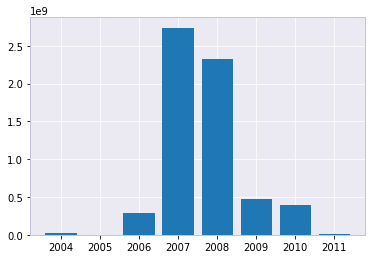

In [29]:
fig, ax = plt.subplots()
plt.bar(overview.index, overview['data_pop'], zorder=2)
MyPlot.border(ax)
MyPlot.bg(ax)
plt.show()

## Compute and merge Gini Index

,country,year,quantile,nb_quantiles,income,gdpppp,country_full,population,gini
0,ALB,2008,1,100,728.89795,7297.0,Albanie,2991651,0.32141
1,ALB,2008,2,100,916.66235,7297.0,Albanie,2991651,0.32141
2,ALB,2008,3,100,1010.91600,7297.0,Albanie,2991651,0.32141
3,ALB,2008,4,100,1086.90780,7297.0,Albanie,2991651,0.32141
4,ALB,2008,5,100,1132.69970,7297.0,Albanie,2991651,0.32141


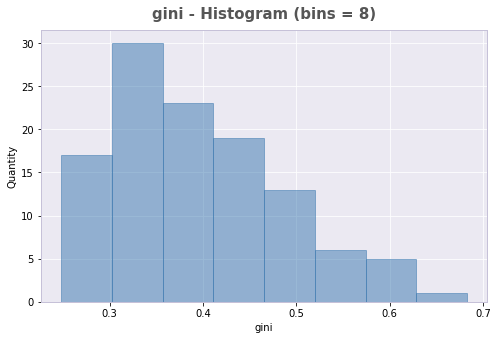

In [30]:
ginis = pd.DataFrame(columns=['country_full', 'gini'])

for country in main_df.country_full.unique():
    data = main_df[main_df.country_full == country]["income"].copy()
    gini = Univa.gini(data)
    
    new_row = {
        'country_full': country,
        'gini': gini
    }
    
    ginis = ginis.append(new_row, ignore_index=True)

main_df = main_df.merge(ginis, how='left', on='country_full')
display(main_df.head())

ginis = Univa(main_df['gini'].drop_duplicates())
ginis.distribution()

# Conclusion

- Les années utilisées par la World Income Distribution vont de 2004 à 2011, avec une forte proportion de 2007 et 2008

- 114 pays sont présents dans l'étude (Environ 50% des pays recensés par la FAO)

- Environ 6 milliards de personnes sont couvertes par l'étude, soit environ 75% de la population mondiale recensée par la FAO

- Les quantiles utilisés par la World Income Distribution sont des percentiles, pour l'ensemble des pays

- L'utilisation des percentiles est une bonne méthode, car cela permet de considérablement réduire la taille de l'échantillon, tout en préservant suffisamment d'informations pour pouvoir l'analyser.

- Le dollar PPP est une unité qui permet de comparer le pouvoir d'achat entre deux pays sans distorsion due aux taux de change.

## Save data

In [31]:
with open("data/main_df.pkl", "wb") as f:
    my_pickle = pickle.Pickler(f)
    my_pickle.dump(main_df)
    
with open("data/overview.pkl", "wb") as f:
    my_pickle = pickle.Pickler(f)
    my_pickle.dump(overview)